In [1]:
import json
from tqdm import tqdm

In [2]:
subset_name = "aspirin_0.4"
train_path = f"/auto/home/knarik/Molecular_Generation_with_GDB13/src/data/data/data_bin_all_rand_{subset_name}_sf_1000K/train/00/train_all_rand_{subset_name}_sf_1000K.jsonl"
print("Reading from path", train_path)

Reading from path /auto/home/knarik/Molecular_Generation_with_GDB13/src/data/data/data_bin_all_rand_aspirin_0.4_sf_1000K/train/00/train_all_rand_aspirin_0.4_sf_1000K.jsonl


In [3]:
 # Loading train set
train_data = []

with open(train_path, "r") as f:
    for line_str in tqdm(f):
        line_obj = json.loads(line_str)
        line_str = line_obj["text"]
        train_data.append( line_str +  "</s>")

train_text = "".join(train_data)    

1000000it [00:01, 747256.43it/s]


In [4]:
  # Loading vocabulary
vocab_path = "/auto/home/knarik/Molecular_Generation_with_GDB13/src/data/tokenizers/tokenizer_sf/tokenizer.json"

with open(vocab_path) as f:
    vocab_dict = json.load(f)

vocab = [item["content"] for item in vocab_dict["added_tokens"]]

In [5]:
 # Counting train tokens
train_len = train_text.count("[") + train_text.count("<")
print("Train len", train_len)

Train len 23304730


In [6]:
# Counting probabilities of each vocabulary token
vocab_prob = []
freq_dict = {}

for token in tqdm(vocab):
    freq = train_text.count(token)
    freq_dict[token] = freq
    token_prob = freq / train_len

    vocab_prob.append(token_prob)

print(freq_dict)

100%|██████████| 187/187 [00:12<00:00, 14.69it/s]

{'<s>': 0, '<pad>': 0, '</s>': 1000000, '<unk>': 0, '[CH1-1]': 0, '[=S@@]': 0, '[/F]': 0, '[/123I]': 0, '[C-1]': 0, '[C@]': 0, '[/CH1]': 0, '[Cl]': 13294, '[#Branch1]': 254360, '[/C@@H1]': 0, '[/C@@]': 0, '[C@@H1]': 0, '[/P@@]': 0, '[B@@-1]': 0, '[\\O]': 0, '[N]': 305061, '[O]': 2324731, '[/S@@+1]': 0, '[\\C@@H1]': 0, '[#N]': 39803, '[/NH1]': 0, '[=B]': 0, '[\\F]': 0, '[=NH0]': 0, '[CH0]': 0, '[C@H1]': 0, '[=O]': 1202487, '[/C@]': 0, '[=P@@H1]': 0, '[=Branch1]': 1040907, '[-\\Ring2]': 0, '[=C]': 1441957, '[127I]': 0, '[\\Cl]': 0, '[/Si]': 0, '[125I]': 0, '[#S]': 0, '[CH1+1]': 0, '[=S@@+1]': 0, '[\\C]': 0, '[=S@]': 0, '[S@@H1]': 0, '[\\C@@]': 0, '[/S+1]': 0, '[\\S]': 0, '[\\C@H1]': 0, '[F+1]': 0, '[PH2]': 0, '[=Ring2]': 0, '[=P@@]': 0, '[BH1-1]': 0, '[/NH0]': 0, '[B@@H1-1]': 0, '[S@@+1]': 0, '[O-1]': 26, '[P@@]': 0, '[S]': 46720, '[S+1]': 0, '[Br]': 0, '[I]': 0, '[\\B-1]': 0, '[C+1]': 0, '[F]': 0, '[/N]': 0, '[/C-1]': 0, '[/O]': 0, '[Ring1]': 2192935, '[OH0]': 0, '[S@+1]': 0, '[=S]': 57

In [23]:
new_dict = dict(sorted(freq_dict.items(), key=lambda a: a[1], reverse=True)[:10])
new_dict

{'[C]': 9472570,
 '[Branch1]': 2513725,
 '[O]': 2324731,
 '[Ring1]': 2192935,
 '[=C]': 1441957,
 '[=O]': 1202487,
 '[=Branch1]': 1040907,
 '</s>': 1000000,
 '[N]': 305061,
 '[Branch2]': 283155}

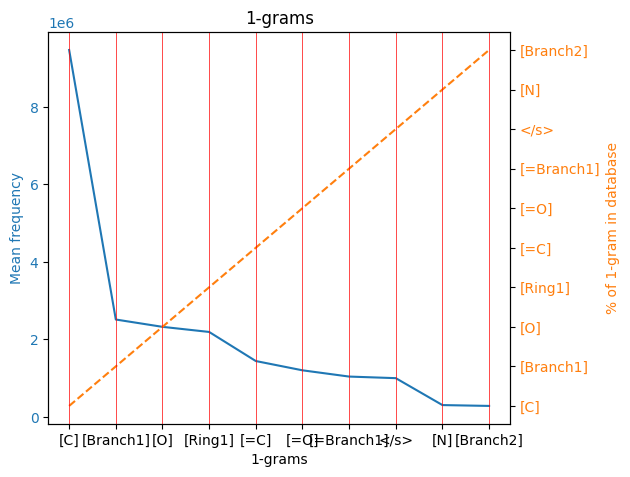

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
mean_frequencies = new_dict.values()
percent_in_database = new_dict.keys()
labels = new_dict.keys()

# Plotting the data
fig, ax1 = plt.subplots()

# Plot mean frequencies
color = 'tab:blue'
ax1.set_xlabel('1-grams')
ax1.set_ylabel('Mean frequency', color=color)
ax1.plot(labels, mean_frequencies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot % of 1-gram in database
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('% of 1-gram in database', color=color)  
ax2.plot(labels, percent_in_database, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add vertical lines
for i in range(len(labels)):
    plt.axvline(x=i, color='red', linestyle='-', linewidth=0.5)

fig.tight_layout()  
plt.title('1-grams')
plt.show()

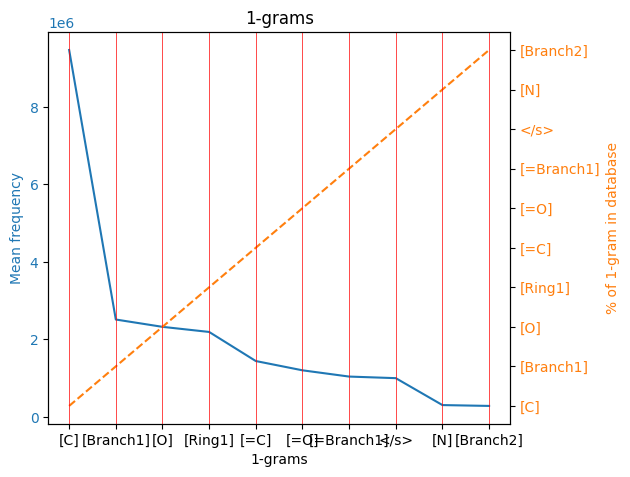

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
mean_frequencies = list(new_dict.values())
percent_in_database = list(new_dict.keys())
labels = list(new_dict.keys())

# Plotting the data
fig, ax1 = plt.subplots()

# Plot mean frequencies
color = 'tab:blue'
ax1.set_xlabel('1-grams')
ax1.set_ylabel('Mean frequency', color=color)
ax1.plot(labels, mean_frequencies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot % of 1-gram in database
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('% of 1-gram in database', color=color)  
ax2.plot(labels, percent_in_database, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add vertical lines
for i in range(len(labels)):
    plt.axvline(x=i, color='red', linestyle='-', linewidth=0.5)

# Rotate x-axis labels
plt.xticks(rotation=90)

fig.tight_layout()  
plt.title('1-grams')
plt.show()